In [126]:
# Filtering out the warnings

import warnings

warnings.filterwarnings('ignore')


# Importing the required libraries 

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

## Exploratory Data Analysis on Uber Request data
### Task 1: Reading the data
- ### Subtask 1.1: Read the Uber Data.
Load the Uber Request Data into a panda data frames and name it Uberdf.

In [127]:
#importing data from CSV file into pandas dataframe(Uberdf)

Uberdf = pd.read_csv("C:/Users/OWNER'S/Desktop/Uber Request Data.CSV")

In [128]:
#Reading Uber Request data

Uberdf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Task 2: Data Cleaning
Correct the Request Timestamp and Drop Timestamp datatype.

- ### Subtask 2.2: Inspect the Dataframe
Inspect the dataframe for dimensions, null-values, and summary of different numeric columns.

In [129]:
#Correcting the data types

Uberdf['Request timestamp'] = pd.to_datetime(Uberdf['Request timestamp'])
Uberdf['Drop timestamp'] = pd.to_datetime(Uberdf['Drop timestamp'])
Uberdf.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [130]:
#Replacing blanks in column name 

Uberdf.columns = [col.replace(' ', '_') for col in Uberdf.columns]
Uberdf.head()

,Request_id,Pickup_point,Driver_id,Status,Request_timestamp,Drop_timestamp
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [131]:
#Drop(Removing) unnecessary columns

Uberdf=Uberdf.drop(['Driver_id'], axis=1)
Uberdf.head()

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


- ### Subtask 2.2: Understand the Dataset

- How many unique pickup points are present in uberReq?
- How many observations are present in uberReq?
- Number of null values?
- Inspecting the null values

In [132]:
#How many unique pickup points are present in Uberdf?

print(Uberdf['Pickup_point'].unique())

['Airport' 'City']


In [133]:
#How many observations are present in Uberdf?

Uberdf.shape

(6745, 5)

In [134]:
# Check the column-wise info of the dataframe(Uberdf)

Uberdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request_id         6745 non-null   int64         
 1   Pickup_point       6745 non-null   object        
 2   Status             6745 non-null   object        
 3   Request_timestamp  6745 non-null   datetime64[ns]
 4   Drop_timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 263.6+ KB


In [135]:
#Inspecting the Null values , column-wise

Uberdf.isnull().sum(axis=0)

Request_id              0
Pickup_point            0
Status                  0
Request_timestamp       0
Drop_timestamp       3914
dtype: int64

In [136]:
Uberdf[(Uberdf['Drop_timestamp'].isnull())].groupby('Status').size()

Status
Cancelled            1264
No Cars Available    2650
dtype: int64

#### NOTE:
The cell above goes on to show that the Drop timestamp rows are empty when the Status is No Cars Available or Cancelled. Since the trips did not happen in those cases, the Drop timestamp can not be available, hence the null values here are valid.

In [137]:
print(len(Uberdf['Pickup_point'].unique()))
print(len(Uberdf['Status'].unique()))

2
3


### Task 2: Univariate Analysis

<AxesSubplot:xlabel='Status'>

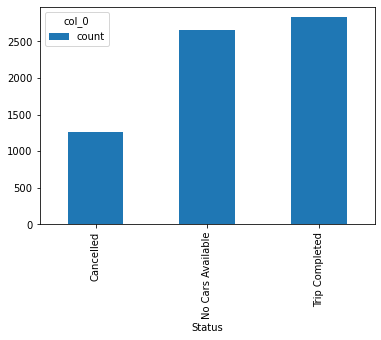

In [138]:
#Univariate analysis on Status column 

status = pd.crosstab(index = Uberdf["Status"], columns="count")     
status.plot.bar()

#### Univariate Analysis conclusion of Status column:
`No cars available` is more than the number of `Trips cancelled`.

<AxesSubplot:xlabel='Pickup_point'>

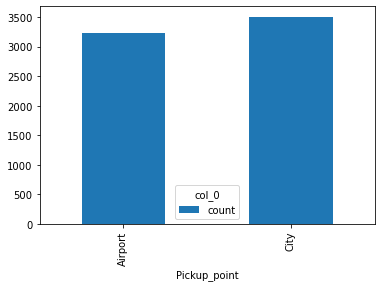

In [139]:
#Univariate analysis on Pickup Point column

pick_point = pd.crosstab(index = Uberdf["Pickup_point"], columns="count")     
pick_point.plot.bar()


#### Univariate Analysis conclusion of Pickup point column:
The pickup points `Airport` and `City` are almost equal times present in the dataset. 

### Task 3: Bivariate Analysis

In [140]:
#grouping by Status and Pickup point.

Uberdf.groupby(['Status', 'Pickup_point']).size()

Status             Pickup_point
Cancelled          Airport          198
                   City            1066
No Cars Available  Airport         1713
                   City             937
Trip Completed     Airport         1327
                   City            1504
dtype: int64

<AxesSubplot:xlabel='Pickup_point', ylabel='count'>

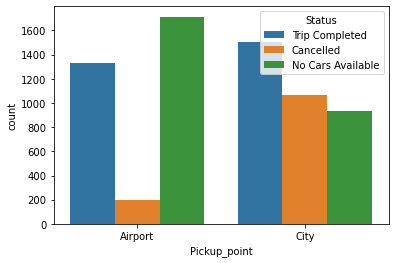

In [141]:
# Visualizing the count of Status and Pickup point bivariate analysis

import seaborn as sns

sns.countplot(x=Uberdf['Pickup_point'],hue =Uberdf['Status'] ,data = Uberdf)

#### Bivariate Analysis conclusion of Status and Pickup point columns:
- There are more `No cars available` from `Airport` to `City`.
- There are more cars `Cancelled` from `City` to `Airport`.

### Task 4: Deriving new metrics

In [142]:
#Request and Drop hours

Uberdf['Request_Hour'] = Uberdf['Request_timestamp'].dt.hour
Uberdf['Request_Day'] = Uberdf['Request_timestamp'].dt.day
Uberdf

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,Request_Hour,Request_Day
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13
...,...,...,...,...,...,...,...
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT,23,15
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT,23,15
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT,23,15
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT,23,15


In [143]:
Uberdf["Time_Slot"]=0
Uberdf

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,Request_Hour,Request_Day,Time_Slot
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,0
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,0
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,0
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,0
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,0
...,...,...,...,...,...,...,...,...
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT,23,15,0
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT,23,15,0
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT,23,15,0
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT,23,15,0


In [169]:
Uberdf['Time_Slot'] = 'Early Morning'
Uberdf.loc[Uberdf['Request_Hour'].between(5,8, inclusive=True),'Time_Slot'] = 'Pre_Morning'
Uberdf.loc[Uberdf['Request_Hour'].between(9,12, inclusive=True),'Time_Slot'] = 'Morning_Rush'
Uberdf.loc[Uberdf['Request_Hour'].between(13,16, inclusive=True),'Time_Slot'] = 'Day_Time'
Uberdf.loc[Uberdf['Request_Hour'].between(17,21, inclusive=True),'Time_Slot'] = 'Evening_Rush'
Uberdf.loc[Uberdf['Request_Hour'].between(21,24, inclusive=True),'Time_Slot'] = 'Night'
Uberdf.loc[Uberdf['Request_Hour'].between(1,4, inclusive=True),'Time_Slot'] = 'Late_Night'
Uberdf

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,Request_Hour,Request_Day,Time_Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Morning_Rush,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening_Rush,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning_Rush,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Pre_Morning,Trip Completed
...,...,...,...,...,...,...,...,...,...
6740,6745,City,No Cars Available,2016-07-15 23:49:03,NaT,23,15,Night,Trip Not Completed
6741,6752,Airport,No Cars Available,2016-07-15 23:50:05,NaT,23,15,Night,Trip Not Completed
6742,6751,City,No Cars Available,2016-07-15 23:52:06,NaT,23,15,Night,Trip Not Completed
6743,6754,City,No Cars Available,2016-07-15 23:54:39,NaT,23,15,Night,Trip Not Completed


#### Session Details
- Pre_Morning: 5AM to 8AM
- Morning_Rush: 9AM-12PM
- Day_Time: 1PM-4PM
- Evening_Ruch: 5PM-9PM
- Night: 9PM-12AM
- Late_Night: 1PM-4AM

In [145]:
#As Demand can include trips completed, cancelled or no cars available, we will create a column with 1 as a value
Uberdf['Demand'] = 1

In [146]:
#As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply value trips completed and 0 otherwise.
Uberdf['Supply'] = 0
Uberdf.loc[(Uberdf['Status'] == 'Trip Completed'),'Supply'] = 1

In [147]:
#As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply value trips completed and 0 otherwise.

Uberdf['Supply'] = 0
Uberdf.loc[(Uberdf['Status'] == 'Trip Completed'),'Supply'] = 1
Uberdf.head()

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,Request_Hour,Request_Day,Time_Slot,Demand,Supply
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Morning_Ruch,1,1
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening_Ruch,1,1
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning_Ruch,1,1
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Night,1,1
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Pre_Morning,1,1


In [148]:
#Demand Supply Gap can be defined as a difference between Demand and Supply

Uberdf['Gap'] = Uberdf['Demand'] - Uberdf['Supply']
Uberdf.loc[Uberdf['Gap']==0,'Gap'] = 'Trip Completed'
Uberdf.loc[Uberdf['Gap']==1,'Gap'] = 'Trip Not Completed'
Uberdf.head()

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,Request_Hour,Request_Day,Time_Slot,Demand,Supply,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Morning_Ruch,1,1,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening_Ruch,1,1,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning_Ruch,1,1,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Night,1,1,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Pre_Morning,1,1,Trip Completed


In [149]:
#Removing unnecessary columns

Uberdf = Uberdf.drop(['Demand', 'Supply'], axis=1)
Uberdf.head()

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,Request_Hour,Request_Day,Time_Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Morning_Ruch,Trip Completed
1,867,Airport,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,17,7,Evening_Ruch,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning_Ruch,Trip Completed
3,2532,Airport,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,21,7,Night,Trip Completed
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Pre_Morning,Trip Completed


### Task 5: Graphical Analysis

<AxesSubplot:xlabel='Time_Slot', ylabel='count'>

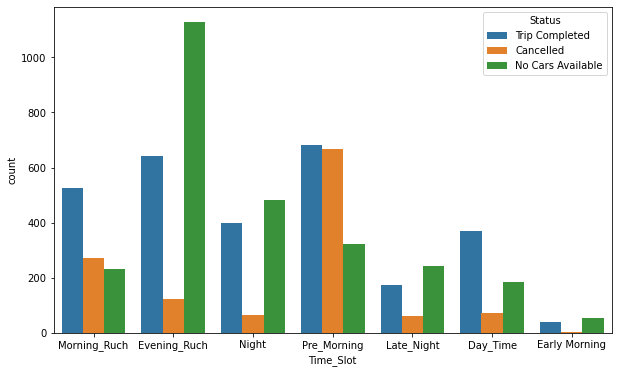

In [150]:
# Plot to find the count of the three requests, according to the defined time slots

plt.figure(figsize=(10,6))
sns.countplot(x=Uberdf['Time_Slot'],hue =Uberdf['Status'] ,data = Uberdf)

Conclusions from above plot :
1. Maximum number of `No Cars Available` status trips can be seen in `Evening_Rush` Session (Time Slot: 9AM to 12PM), followed by `Night` session (9PM to 12AM).
2. Maximum number of `Cancelled` status trips can be seen in `Pre_Morning` Session (Time Slot: 5AM to 8AM), followed by `Morning_Rush` session (9AM to 12PM).

In [168]:
Uberdf_pre_morning=Uberdf[Uberdf['Time_Slot']=='Pre_Morning']

<AxesSubplot:xlabel='Pickup_point', ylabel='count'>

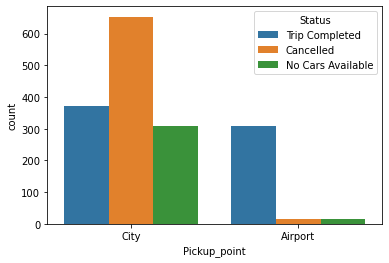

In [152]:
# Plot to find the count of the Pre_Morning session, according to the defined time slots

sns.countplot(x="Pickup_point",hue="Status",data=Uberdf_pre_morning)

Conclusions from above plot :
Maximum number of `Cancelled` status trips can be seen in `City`.

#### Severity of problem by location and their count (cancellation of cab as per the pickup location at `Pre_Morning` hours)

In [153]:
Uberdf_airport_cancelled=Uberdf_pre_morning.loc[(Uberdf_pre_morning["Pickup_point"]=="Airport") & (Uberdf_pre_morning["Status"]=="Cancelled")]

In [154]:
Uberdf_airport_cancelled.shape[0]

15

In [155]:
Uberdf_city_cancelled=Uberdf_pre_morning.loc[(Uberdf_pre_morning["Pickup_point"]=="City") & (Uberdf_pre_morning["Status"]=="Cancelled")]

In [156]:
Uberdf_city_cancelled.shape[0]

653

#### Supply and demand

In [157]:
Uberdf_pre_morning

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,Request_Hour,Request_Day,Time_Slot,Gap
4,3112,City,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,8,13,Pre_Morning,Trip Completed
6,4270,Airport,Trip Completed,2016-07-14 06:15:32,2016-07-14 07:13:15,6,14,Pre_Morning,Trip Completed
7,5510,Airport,Trip Completed,2016-07-15 05:11:52,2016-07-15 06:07:52,5,15,Pre_Morning,Trip Completed
9,267,City,Trip Completed,2016-11-07 06:46:00,2016-11-07 07:25:00,6,7,Pre_Morning,Trip Completed
10,1467,Airport,Trip Completed,2016-12-07 05:08:00,2016-12-07 06:02:00,5,7,Pre_Morning,Trip Completed
...,...,...,...,...,...,...,...,...,...
6295,5813,City,No Cars Available,2016-07-15 08:46:26,NaT,8,15,Pre_Morning,Trip Not Completed
6296,5810,City,No Cars Available,2016-07-15 08:46:52,NaT,8,15,Pre_Morning,Trip Not Completed
6297,5818,City,No Cars Available,2016-07-15 08:49:20,NaT,8,15,Pre_Morning,Trip Not Completed
6298,5819,City,No Cars Available,2016-07-15 08:49:20,NaT,8,15,Pre_Morning,Trip Not Completed


In [158]:
Uberdf_pre_morning.loc[(Uberdf_pre_morning["Pickup_point"]=="City")].shape[0]

1335

In [159]:
Uberdf_pre_morning.loc[(Uberdf_pre_morning["Pickup_point"]=="City") & (Uberdf_pre_morning["Status"]=="Trip Completed")].shape[0]

373

In [160]:
Uberdf_pre_morning.loc[(Uberdf_pre_morning["Pickup_point"]=="Airport")].shape[0]

337

In [161]:
Uberdf_pre_morning.loc[(Uberdf_pre_morning["Pickup_point"]=="Airport") & (Uberdf_pre_morning["Status"]=="Trip Completed")].shape[0]

308

### Supply and Demand for Morning Rush

In [170]:
Uberdf_moring_rush=Uberdf[Uberdf['Time_Slot']=='Morning_Rush']

,Request_id,Pickup_point,Status,Request_timestamp,Drop_timestamp,Request_Hour,Request_Day,Time_Slot,Gap
0,619,Airport,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,11,7,Morning_Rush,Trip Completed
2,1807,City,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,9,7,Morning_Rush,Trip Completed
11,1983,City,Trip Completed,2016-12-07 12:30:00,2016-12-07 12:57:00,12,7,Morning_Rush,Trip Completed
16,4652,City,Trip Completed,2016-07-14 12:01:02,2016-07-14 12:36:46,12,14,Morning_Rush,Trip Completed
18,535,Airport,Trip Completed,2016-11-07 10:00:00,2016-11-07 10:31:00,10,7,Morning_Rush,Trip Completed
...,...,...,...,...,...,...,...,...,...
6348,6025,City,No Cars Available,2016-07-15 12:45:32,NaT,12,15,Morning_Rush,Trip Not Completed
6349,6022,City,No Cars Available,2016-07-15 12:50:24,NaT,12,15,Morning_Rush,Trip Not Completed
6350,6029,City,No Cars Available,2016-07-15 12:51:21,NaT,12,15,Morning_Rush,Trip Not Completed
6351,6028,Airport,No Cars Available,2016-07-15 12:52:31,NaT,12,15,Morning_Rush,Trip Not Completed


In [183]:
Uberdf_city_cancelled=Uberdf_morning_rush.loc[(Uberdf_morning_rush["Pickup_point"]=="City") & (Uberdf_morning_rush["Status"]=="Cancelled")]

<AxesSubplot:xlabel='Pickup_point', ylabel='count'>

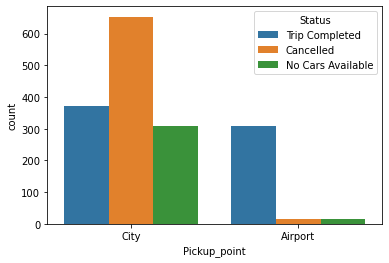

In [184]:
sns.countplot(x="Pickup_point",hue="Status",data=Uberdf_morning_rush)

In [185]:
Uberdf_city_cancelled.shape[0]

653

In [186]:
Uberdf_morning_rush["Status"].value_counts()

Trip Completed       681
Cancelled            668
No Cars Available    323
Name: Status, dtype: int64

In [188]:
Uberdf_morning_rush.loc[(Uberdf_morning_rush["Pickup_point"]=="City")].shape[0]

1335

In [190]:
Uberdf_morning_rush.loc[(Uberdf_morning_rush["Pickup_point"]=="City") & (Uberdf_morning_rush["Status"]=="Trip Completed")].shape[0]

373

In [192]:
Uberdf_morning_rush.loc[(Uberdf_morning_rush["Pickup_point"]=="Airport")].shape[0]

337

In [194]:
Uberdf_morning_rush.loc[(Uberdf_morning_rush["Pickup_point"]=="Airport") & (Uberdf_morning_rush["Status"]=="Trip Completed")].shape[0]

308

### Severity problem at each location by looking at cancellation of cabs in each of the pickup location

In [195]:
Uberdf_morning_rush.loc[(Uberdf_morning_rush["Pickup_point"]=="City") & (Uberdf_morning_rush["Status"]=="Cancelled")].shape[0]

653

In [196]:
Uberdf_morning_rush.loc[(Uberdf_morning_rush["Pickup_point"]=="Airport") & (Uberdf_morning_rush["Status"]=="Cancelled")].shape[0]

15

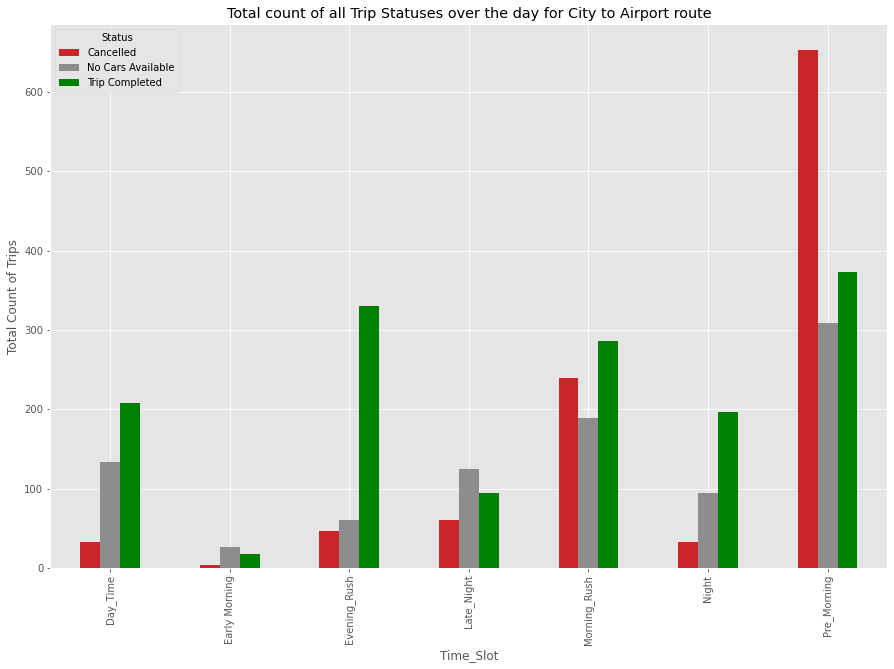

In [203]:
# Filtering out trips in the City to Airport route. Pick-up Point - City
df_citytoairport=Uberdf[Uberdf["Pickup_point"].str.contains('City')==True]
plt.style.use('ggplot')
colors = ["#CC2529", "#8E8D8D","#008000"]
df_citytoairport.groupby(['Time_Slot','Status']).Status.count().unstack().plot.bar(legend=True, figsize=(15,10), color=colors)
plt.title('Total count of all Trip Statuses over the day for City to Airport route')
plt.xlabel('Time_Slot')
plt.ylabel('Total Count of Trips')
plt.show()

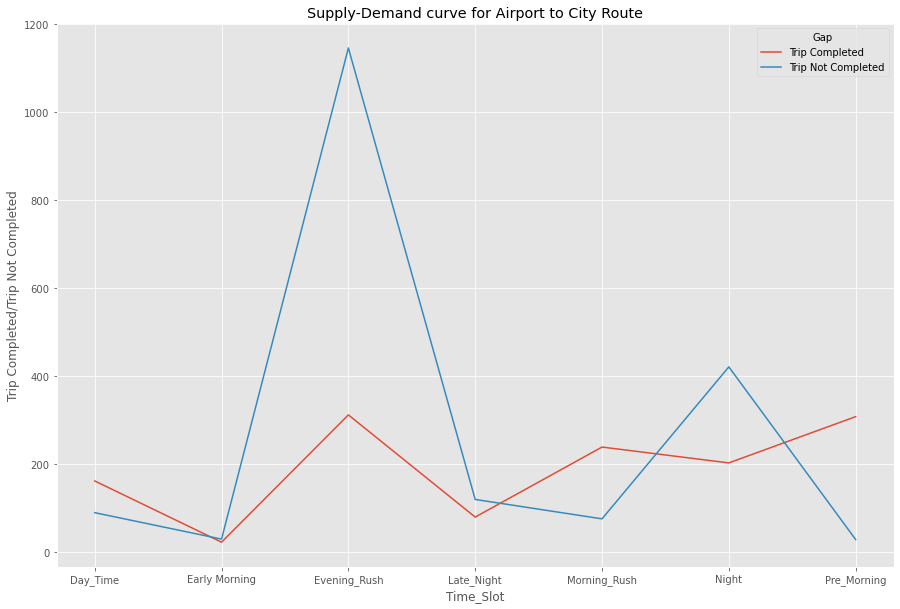

In [207]:
#Plotting Supply and Demand on the Airport to City route
df_airporttocity_supplydemand=Uberdf[Uberdf["Pickup_point"].str.contains('Airport')==True]
plt.style.use('ggplot')
df_airporttocity_supplydemand.groupby(['Time_Slot','Gap']).Gap.count().unstack().plot.line(legend=True, figsize=(15,10))
plt.title('Supply-Demand curve for Airport to City Route')
plt.xlabel('Time_Slot')
plt.ylabel('Trip Completed/Trip Not Completed')
plt.show()


### Hypothesis :
- ### Pickup Point - City :
As per the analysis, the `Pre_Morning` time slot is most problematic where the requests are being cancelled. Most probably the requests are being cancelled by the drivers due to the morning rush as it being the office hours and seeing the destination as airport which would be too far, the driver would think to earn more for the shorter trips within the city.

- ### Pickup Point - Airport :
Upon analysis, the `Morning_Rush` time slot seems to be most problematic for pickup points as airport where the requests being No Cars Available. The reason seems to be that not enough cars are available to service the requests as cars might not be available at the airport due to the cars serving inside the city.

#### Conclusions :
Based on the data analysis performed, following recommendation can be used by Uber to bridge the gap between supply and demand: -

- For bridging the demand supply gap from airport to city, making a permanent stand in the airport itself where the cabs will be available at all times and the incomplete requests can come down significantly.
- Uber can provide some incentives to the driver who complete the trip from city to airport in the morning part. This might result the driver to not cancel the request from city to airport trips.
- Last but sure solution to bring down the gap is to increase the numbers of cab in its fleet.